## Homework

* The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In this homework we use the California Housing Prices dataset.

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = 'data\housing.csv'
df = pd.read_csv(data_path)

In [4]:
cols = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity']

In [5]:
df = df[cols]

Missing values

In [8]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

 Fill NAs with 0.

In [11]:
df = df.fillna(0)

Apply the log tranform to median_house_value

In [13]:
df.median_house_value = np.log1p(df.median_house_value)

In [14]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY


Do train/validation/test split with 60%/20%/20% distribution

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [19]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [20]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = df_train.median_house_value
y_val = df_val.median_house_value
y_test = df_test.median_house_value

In [25]:
del  df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [26]:
from sklearn.feature_extraction import DictVectorizer

In [27]:
train_dicts = df_train.to_dict(orient='records')

In [36]:
train_dicts[0]

{'latitude': 34.63,
 'longitude': -118.18,
 'housing_median_age': 19.0,
 'total_rooms': 3562.0,
 'total_bedrooms': 606.0,
 'population': 1677.0,
 'households': 578.0,
 'median_income': 4.1573,
 'ocean_proximity': 'INLAND'}

In [38]:
dv = DictVectorizer(sparse=False)

In [39]:
X_train = dv.fit_transform(train_dicts)

In [82]:
features = dv.get_feature_names_out()

In [83]:
features

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'ocean_proximity=ISLAND',
       'ocean_proximity=NEAR BAY', 'ocean_proximity=NEAR OCEAN',
       'population', 'total_bedrooms', 'total_rooms'], dtype=object)

In [41]:
val_dicts = df_val.to_dict(orient='records')

In [42]:
X_val = dv.transform(val_dicts)

## Question 1

Train a decision tree regressor to predict the median_house_value variable.

Train a model with max_depth=1.

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
regressor = DecisionTreeRegressor(max_depth=1)

In [46]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [54]:
from sklearn.tree import export_text

In [116]:
print(export_text(regressor, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



C:\Users\Tatsi\miniconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Question 2

* Train a random forest model with these parameters:

n_estimators=10

random_state=1

n_jobs=-1 (optional - to make training faster)

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [60]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [62]:
y_pred = rf.predict(X_val)

In [64]:
from sklearn.metrics import mean_squared_error 

In [67]:
rmse = mean_squared_error(y_pred, y_val)
rmse.round(3)

0.06

## Question 3

* Now let's experiment with the n_estimators parameter

* Try different values of this parameter from 10 to 200 with step 10.
* random_state to 1.
* Evaluate the model on the validation dataset.

In [70]:
n_estimators = list(range(10, 201, 10))
rmse_score = []

for n in n_estimators:
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_pred, y_val)
    rmse_score.append(rmse)

In [71]:
import matplotlib.pyplot as plt

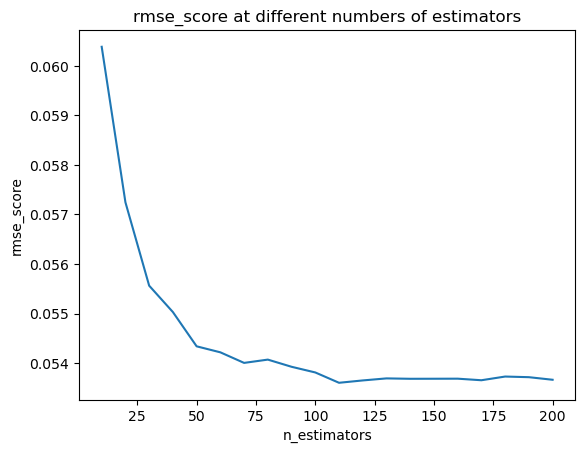

In [117]:
plt.plot(n_estimators, rmse_score)
plt.xlabel('n_estimators')
plt.ylabel('rmse_score')
plt.title('rmse_score at different numbers of estimators')
plt.show()



After about n_estimators=110 RMSE stops improving

## Question 4

* Try different values of max_depth: [10, 15, 20, 25]
* For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
* Fix the random seed: random_state=1

In [73]:
max_depths = [10, 15, 20, 25]

scores = []

for max_depth in max_depths:
    for n in n_estimators:
        rf = RandomForestRegressor(n_estimators=n, max_depth=max_depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_pred, y_val)
        scores.append((max_depth, n, rmse))

In [78]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by='rmse')

,max_depth,n_estimators,rmse
70,25,110,0.053479
71,25,120,0.053498
76,25,170,0.053565
73,25,140,0.053573
75,25,160,0.053585
...,...,...,...
4,10,50,0.062596
3,10,40,0.063032
2,10,30,0.063326
1,10,20,0.063900


## Question 5

* Train the model with these parametes:

n_estimators=10,

max_depth=20,

random_state=1,

n_jobs=-1 (optional)

* Get the feature importance information from this model


In [79]:
model = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [84]:
features[model.feature_importances_.argmax()]

'median_income'

## Question 6

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds

In [87]:
!pip install xgboost

     -------------------------------------- 125.4/125.4 MB 2.2 MB/s eta 0:00:00


In [88]:
import xgboost as xgb

In [95]:
features[5] = 'ocean_proximity=1H OCEAN'

In [98]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [121]:
scores = []

for eta in [0.3, 0.1, 0.01]:
    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'reg:squarederror',
        'nthread': 8,

        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=100)
    rmse = mean_squared_error(y_pred, y_val)
    scores.append((eta, rmse))


In [122]:
scores

[(0.3, 0.18691321413928091),
 (0.1, 0.18691321413928091),
 (0.01, 0.18691321413928091)]